In [1]:
# In jupyter lab
%matplotlib nbagg

from matplotlib import pyplot as plt
from matplotlib import cm, colors

#import matplotlib as mpl
#mpl.rcParams.update(mpl.rcParamsDefault)

# importing system packages
import os
import sys
import glob
# import h5py
import time
import itertools

# importing the workhorse
import numpy as np
import pandas as pd

from specUtils import *
from fit1D import *

In [3]:
sf = getSpecFile('path_to_spec')

### Batch extraction and fitting

<IPython.core.display.Javascript object>


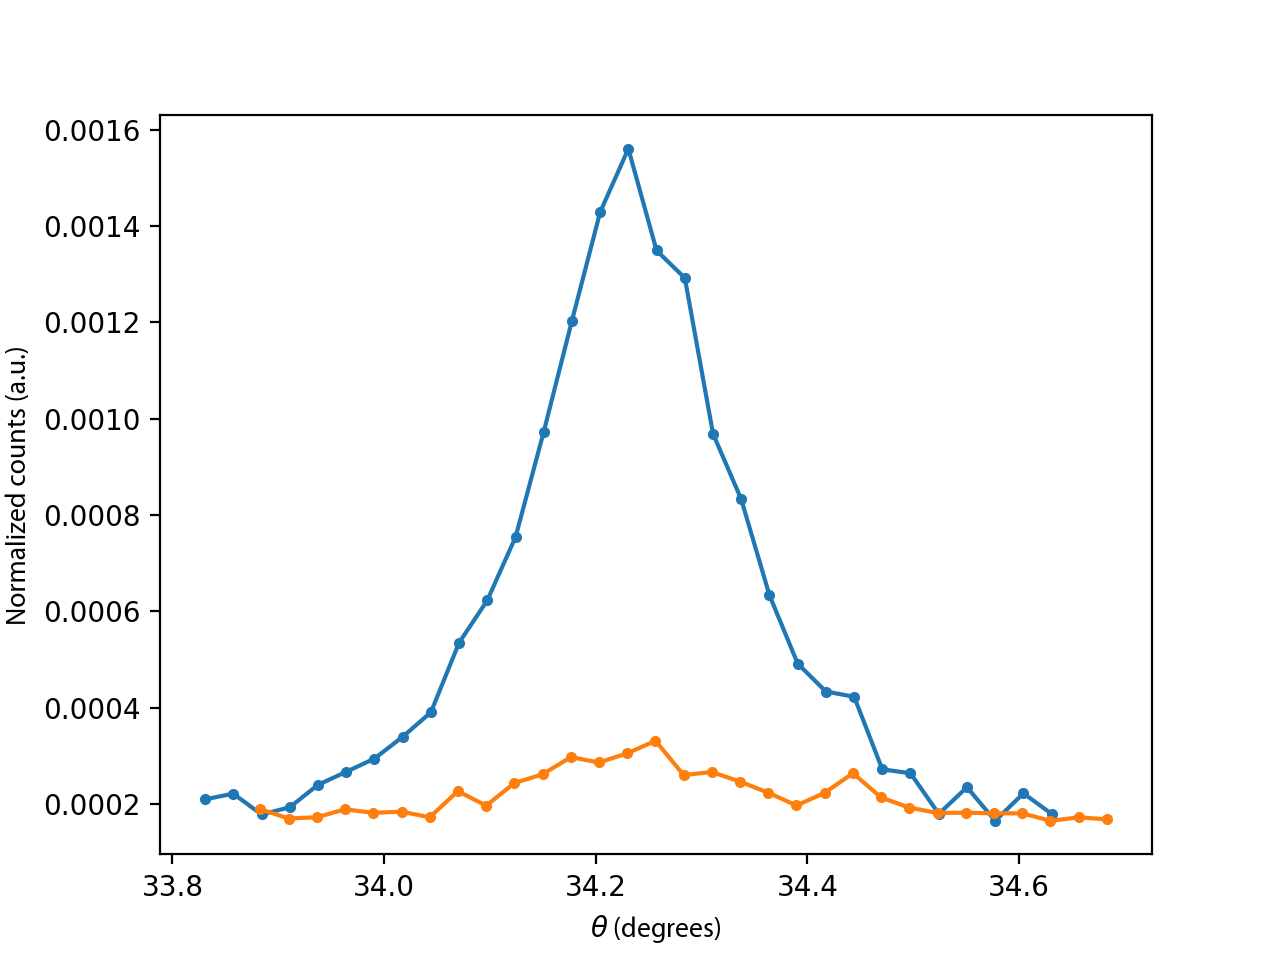

In [16]:
#first find background
bgid = np.array([57, 60, 63, 66])

df2 = getSpecScan(sf, 57)
x_bg = np.array(df2['Eta'])
y_bg = np.zeros(len(x_bg))

for i in bgid:
    df__ = getSpecScan(sf, i)
    tmpy = np.array(df__['Detector']/df__['Ion_Ch_2'])
    y_bg = np.add(tmpy, y_bg)
    
y_bg = y_bg/len(bgid)

df_42 = getSpecScan(sf, 42)

plt.figure()
plt.plot(df_42['Eta'], df_42['Detector']/df_42['Ion_Ch_2'], '.-', label='103 K')
plt.plot(x_bg, y_bg, '.-', label='background')
plt.xlabel(r'$\theta$ (degrees)', fontproperties = myfont)
plt.ylabel(r'Normalized counts (a.u.)', fontproperties = myfont)
#plt.legend(prop = myfont)
plt.savefig('background.pdf')

[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 40
    # data points      = 31
    # variables        = 5
    chi-square         = 9.7299e-09
    reduced chi-square = 3.7423e-10
    Akaike info crit   = -668.343668
    Bayesian info crit = -661.173732
[[Variables]]
    Area:    5.4751e-05 +/- 1.0915e-05 (19.94%) (init = 4.175638e-05)
    Center:  34.2345419 +/- 0.00936990 (0.03%) (init = 34.2565)
    HWHM:    0.11869933 +/- 0.02105614 (17.74%) (init = 0.08)
    Slope:   1.5187e-05 +/- 1.7082e-05 (112.48%) (init = -2.642174e-05)
    Offset: -3.5832e-04 +/- 5.8855e-04 (164.25%) (init = 0.0001648637)
[[Correlations]] (unreported correlations are < 0.100)
    C(Slope, Offset)  = -0.9999
    C(Area, HWHM)     = +0.9105
    C(Center, Slope)  = -0.4468
    C(Center, Offset) = +0.4464
    C(Area, Offset)   = -0.3264
    C(Area, Slope)    = +0.3126
    C(HWHM, Offset)   = -0.2597
    C(HWHM, Slope)    = +0.2476
    C(Area, Center)   = -0.1235


<IPython.core.display.Javascript object>


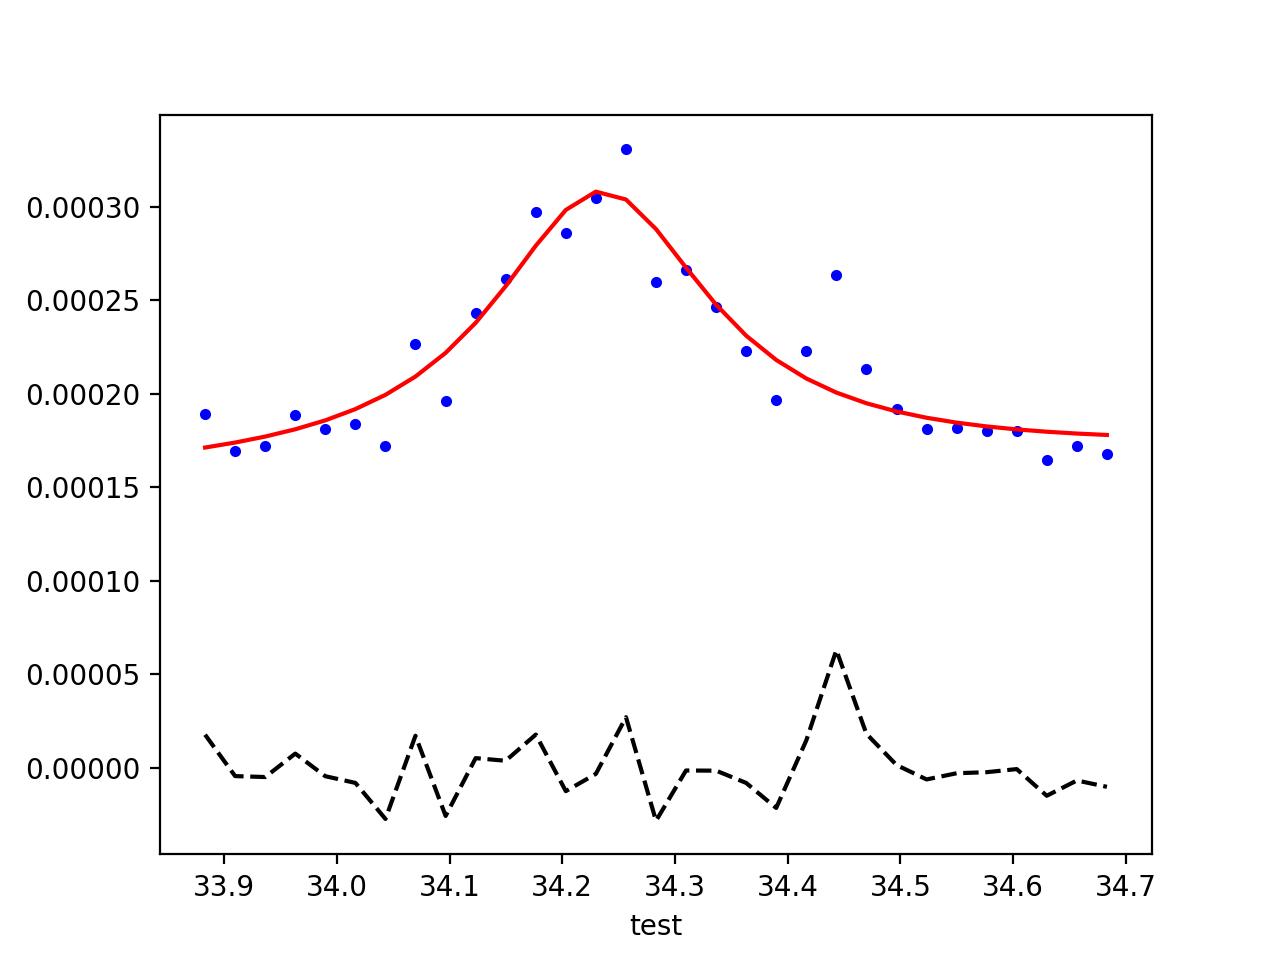

In [17]:
#try subtracting background

fit_params_bg, _, _, fitted, _, _ = do_fit(x_bg, y_bg, LorLinearBG, guess_LorLinearBG, verbose=True, plotFit=True)
plt.xlabel('test')
plt.savefig('background_fit.png')

In [18]:
def LorLBG(params, x):
    '''
    Lor with linear BG
    '''
    Area = params['value'].loc['Area']
    x0 = params['value'].loc['Center']
    w = params['value'].loc['HWHM']
    A = params['value'].loc['Slope']
    BG = params['value'].loc['Offset']
        
    model = Area*w/((x-x0)**2+w**2)/np.pi+A*x+BG
    return model

lbg = LorLBG(fit_params_bg, x_bg)

[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 37
    # data points      = 31
    # variables        = 5
    chi-square         = 6.5987e-08
    reduced chi-square = 2.5380e-09
    Akaike info crit   = -609.001699
    Bayesian info crit = -601.831762
[[Variables]]
    Area:    6.4783e-04 +/- 2.5171e-05 (3.89%) (init = 0.0004307638)
    Center:  34.2232257 +/- 0.00185636 (0.01%) (init = 34.22812)
    HWHM:    0.11208735 +/- 0.00402721 (3.59%) (init = 0.08)
    Slope:   1.9953e-05 +/- 4.1653e-05 (208.76%) (init = -2.867346e-06)
    Offset: -8.4754e-04 +/- 0.00142657 (168.32%) (init = -6.880166e-06)
[[Correlations]] (unreported correlations are < 0.100)
    C(Slope, Offset)  = -0.9999
    C(Area, HWHM)     = +0.9019
    C(Center, Slope)  = -0.4120
    C(Center, Offset) = +0.4120


<IPython.core.display.Javascript object>


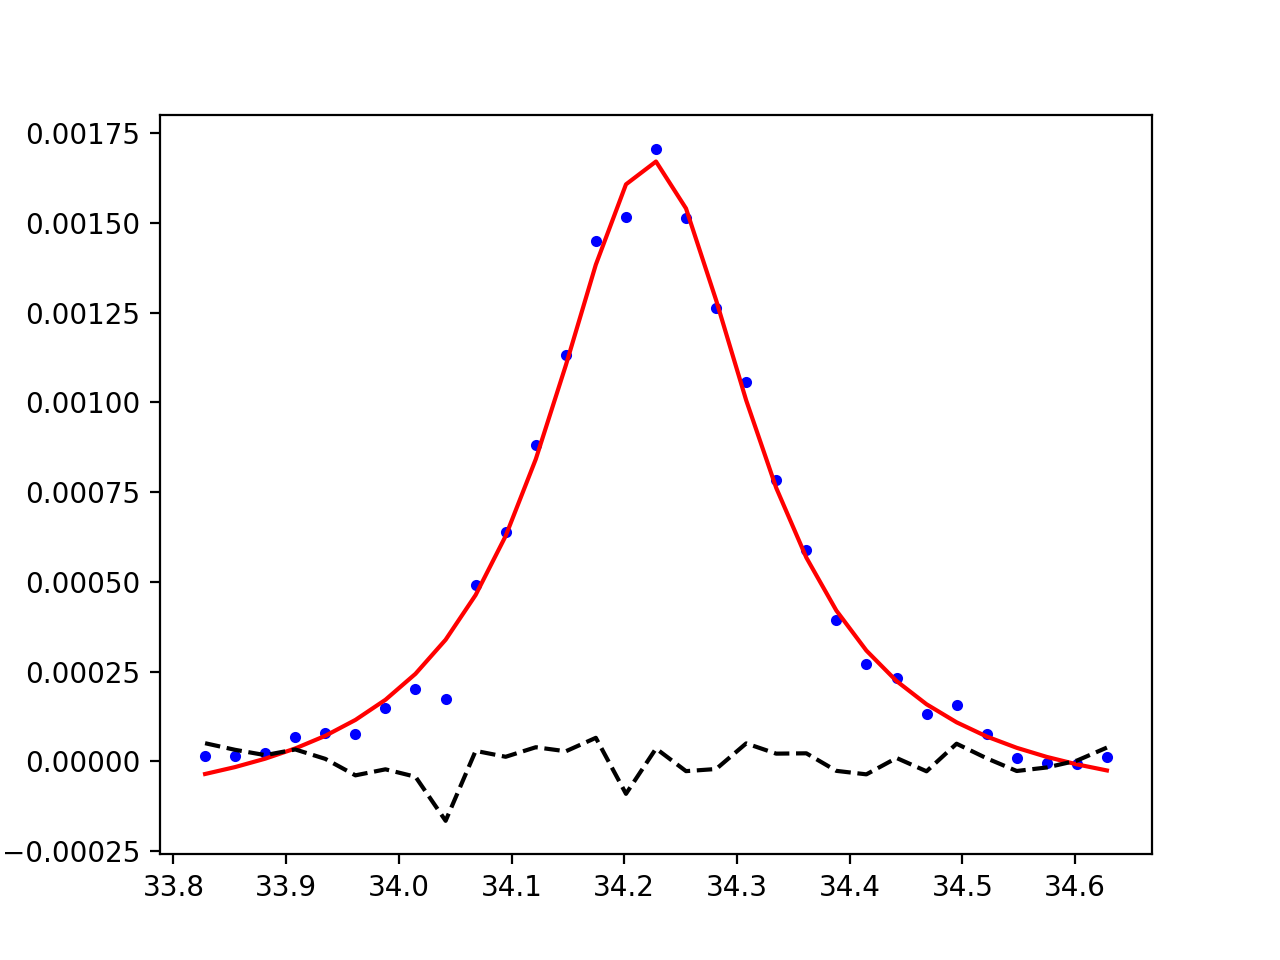

[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 37
    # data points      = 31
    # variables        = 5
    chi-square         = 8.5547e-08
    reduced chi-square = 3.2903e-09
    Akaike info crit   = -600.953715
    Bayesian info crit = -593.783779
[[Variables]]
    Area:    6.3588e-04 +/- 2.7064e-05 (4.26%) (init = 0.0004841267)
    Center:  34.2271824 +/- 0.00201573 (0.01%) (init = 34.22313)
    HWHM:    0.10784740 +/- 0.00430881 (4.00%) (init = 0.093375)
    Slope:   1.2374e-05 +/- 4.7039e-05 (380.15%) (init = 4.587874e-05)
    Offset: -5.5940e-04 +/- 0.00160944 (287.71%) (init = 1.625881e-05)
[[Correlations]] (unreported correlations are < 0.100)
    C(Slope, Offset)  = -0.9999
    C(Area, HWHM)     = +0.8976
    C(Center, Slope)  = -0.3954
    C(Center, Offset) = +0.3953


<IPython.core.display.Javascript object>


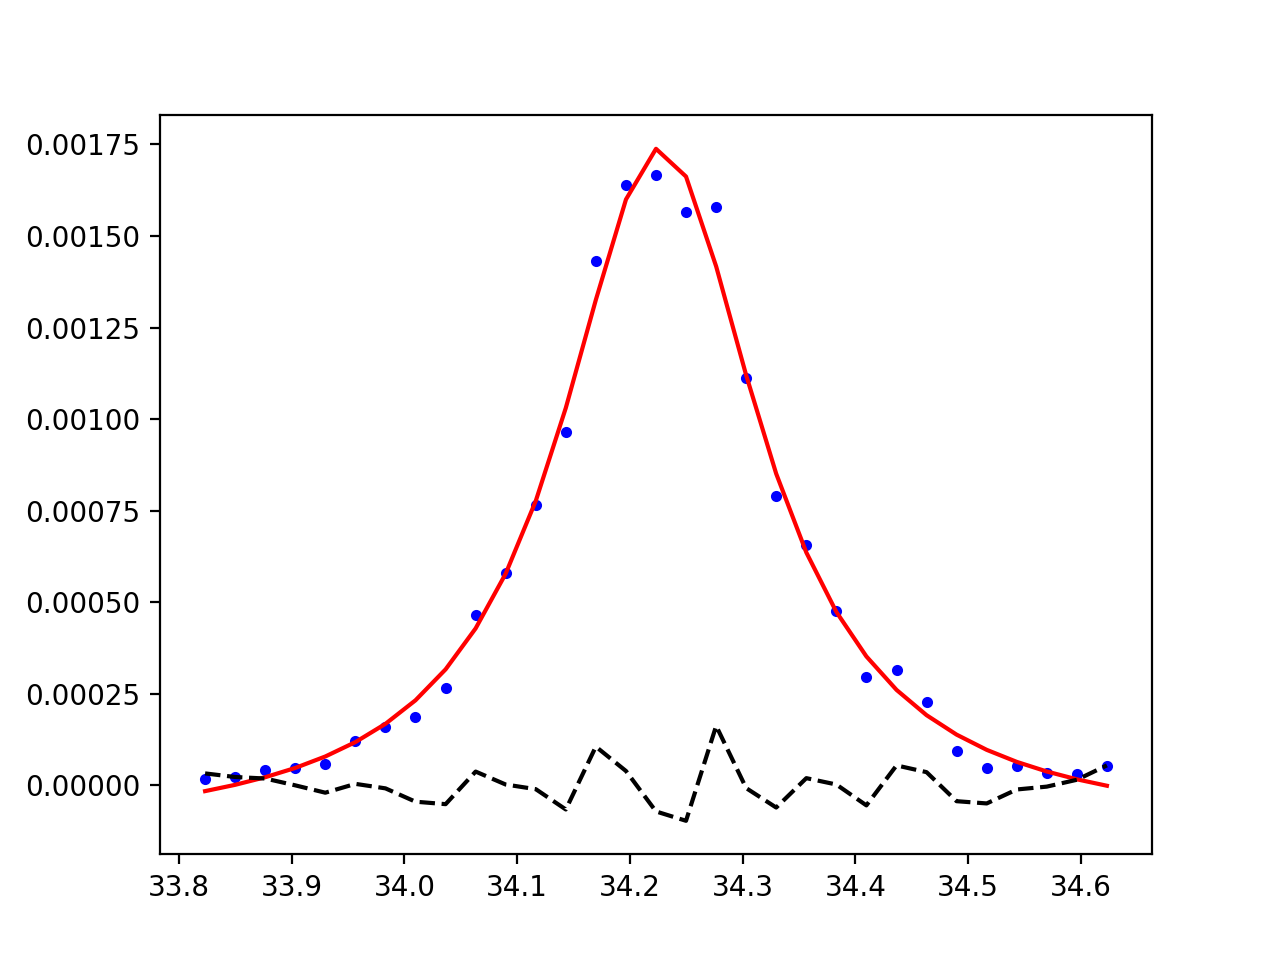

[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 37
    # data points      = 31
    # variables        = 5
    chi-square         = 2.8313e-08
    reduced chi-square = 1.0890e-09
    Akaike info crit   = -635.231525
    Bayesian info crit = -628.061589
[[Variables]]
    Area:    6.3223e-04 +/- 1.5650e-05 (2.48%) (init = 0.000510294)
    Center:  34.2278809 +/- 0.00117356 (0.00%) (init = 34.22625)
    HWHM:    0.10823966 +/- 0.00251183 (2.32%) (init = 0.093375)
    Slope:  -2.2930e-05 +/- 2.7074e-05 (118.07%) (init = -3.357251e-05)
    Offset:  6.4376e-04 +/- 9.2662e-04 (143.94%) (init = -1.286565e-05)
[[Correlations]] (unreported correlations are < 0.100)
    C(Slope, Offset)  = -0.9999
    C(Area, HWHM)     = +0.8980
    C(Center, Slope)  = -0.3969
    C(Center, Offset) = +0.3968


<IPython.core.display.Javascript object>


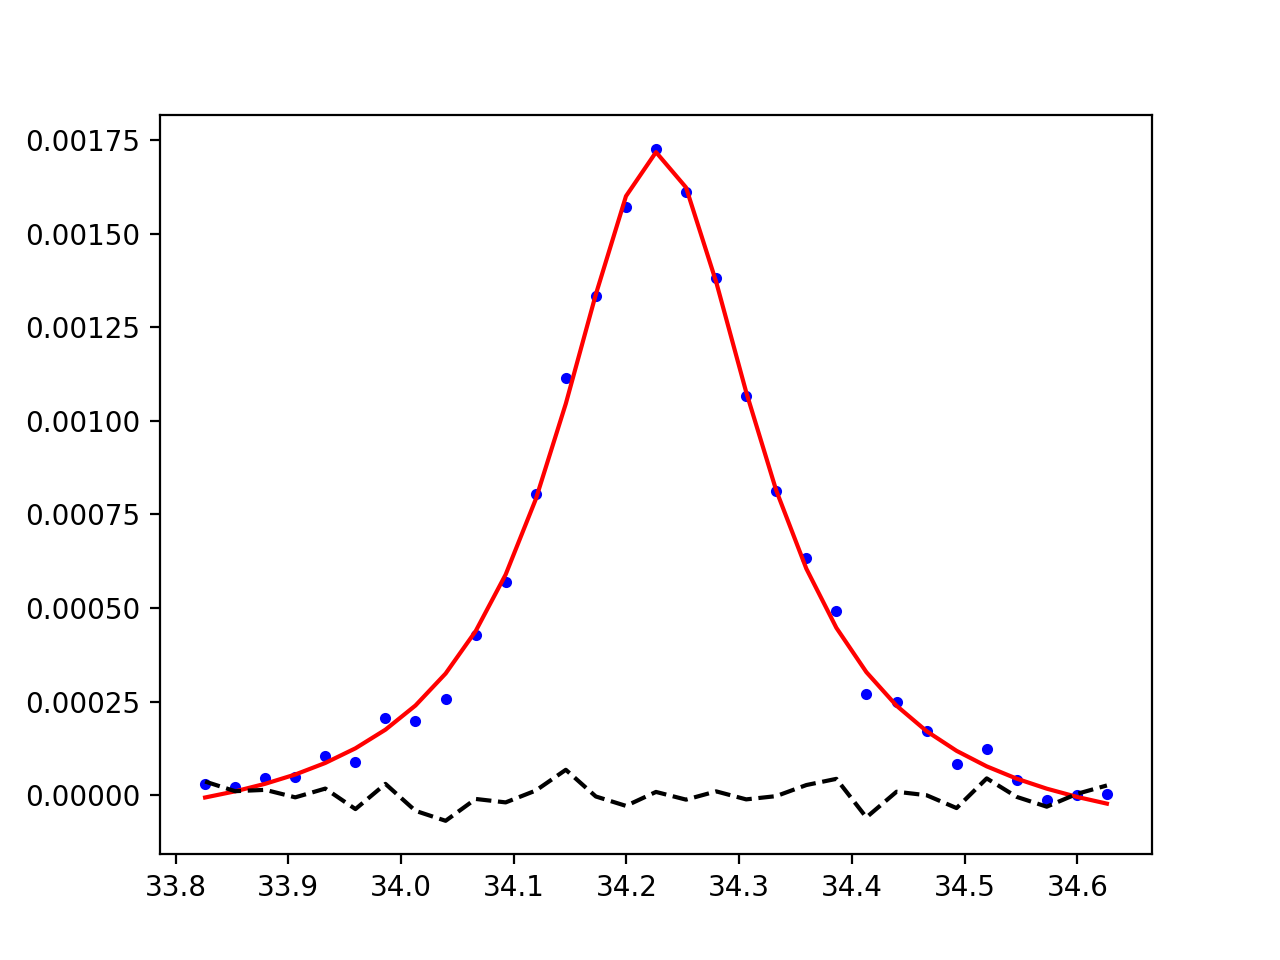

[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 37
    # data points      = 31
    # variables        = 5
    chi-square         = 6.3109e-08
    reduced chi-square = 2.4273e-09
    Akaike info crit   = -610.383936
    Bayesian info crit = -603.214000
[[Variables]]
    Area:    6.2231e-04 +/- 2.2446e-05 (3.61%) (init = 0.0005144987)
    Center:  34.2290809 +/- 0.00169838 (0.00%) (init = 34.2285)
    HWHM:    0.10529081 +/- 0.00359776 (3.42%) (init = 0.093375)
    Slope:   2.6654e-05 +/- 4.0201e-05 (150.83%) (init = -1.444433e-05)
    Offset: -0.00104590 +/- 0.00137613 (131.57%) (init = 1.588067e-05)
[[Correlations]] (unreported correlations are < 0.100)
    C(Slope, Offset)  = -0.9999
    C(Area, HWHM)     = +0.8950
    C(Center, Slope)  = -0.3852
    C(Center, Offset) = +0.3851


<IPython.core.display.Javascript object>


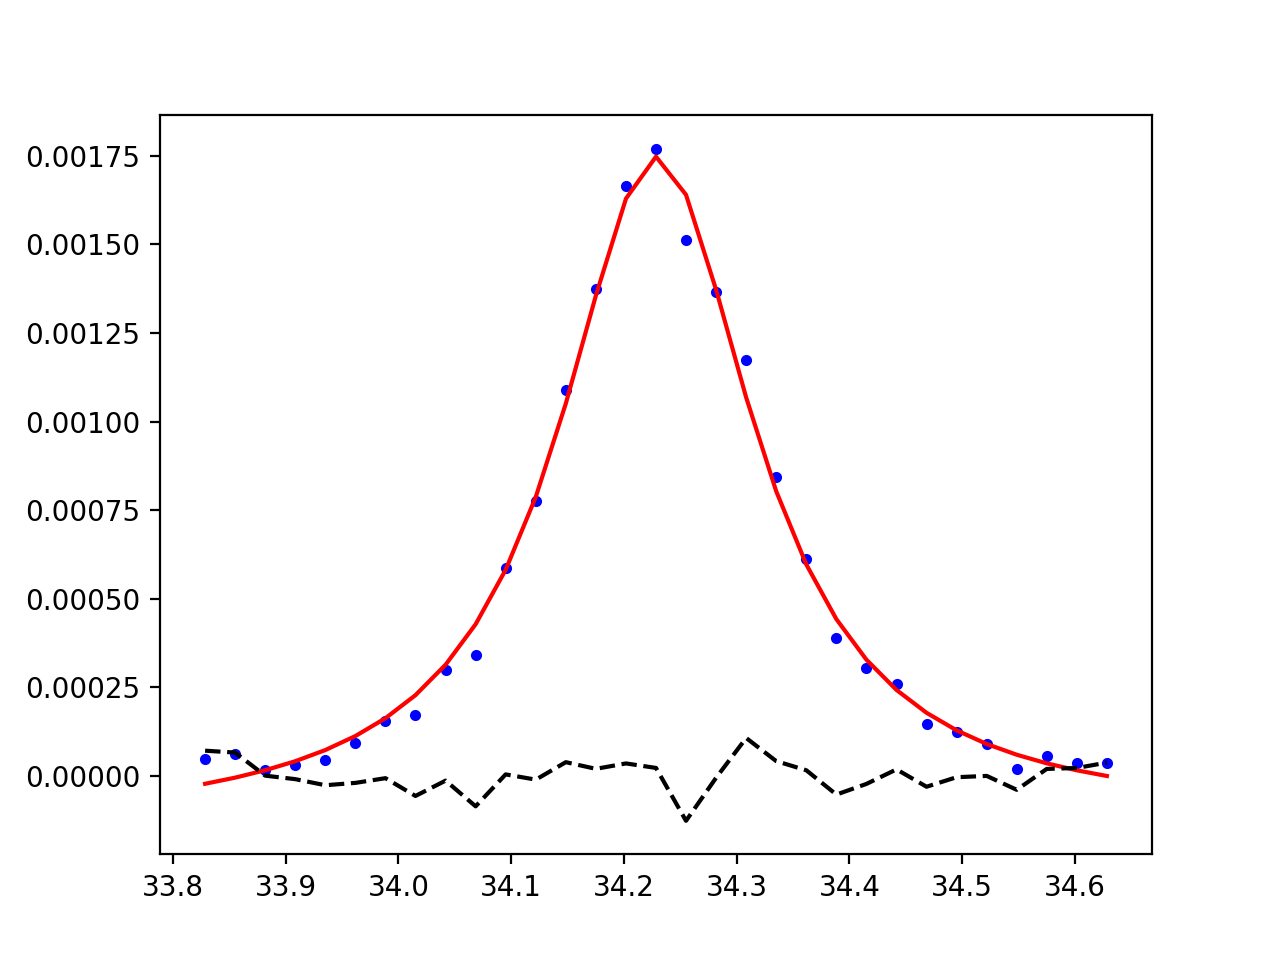

[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 31
    # data points      = 31
    # variables        = 5
    chi-square         = 5.3199e-08
    reduced chi-square = 2.0461e-09
    Akaike info crit   = -615.679891
    Bayesian info crit = -608.509955
[[Variables]]
    Area:    5.9795e-04 +/- 2.0961e-05 (3.51%) (init = 0.0005042685)
    Center:  34.2311105 +/- 0.00165552 (0.00%) (init = 34.23237)
    HWHM:    0.10653495 +/- 0.00352235 (3.31%) (init = 0.093375)
    Slope:   1.2332e-05 +/- 3.6994e-05 (299.98%) (init = 4.431513e-05)
    Offset: -5.4853e-04 +/- 0.00126670 (230.93%) (init = -1.657835e-05)
[[Correlations]] (unreported correlations are < 0.100)
    C(Slope, Offset)  = -0.9999
    C(Area, HWHM)     = +0.8963
    C(Center, Slope)  = -0.3901
    C(Center, Offset) = +0.3901


<IPython.core.display.Javascript object>


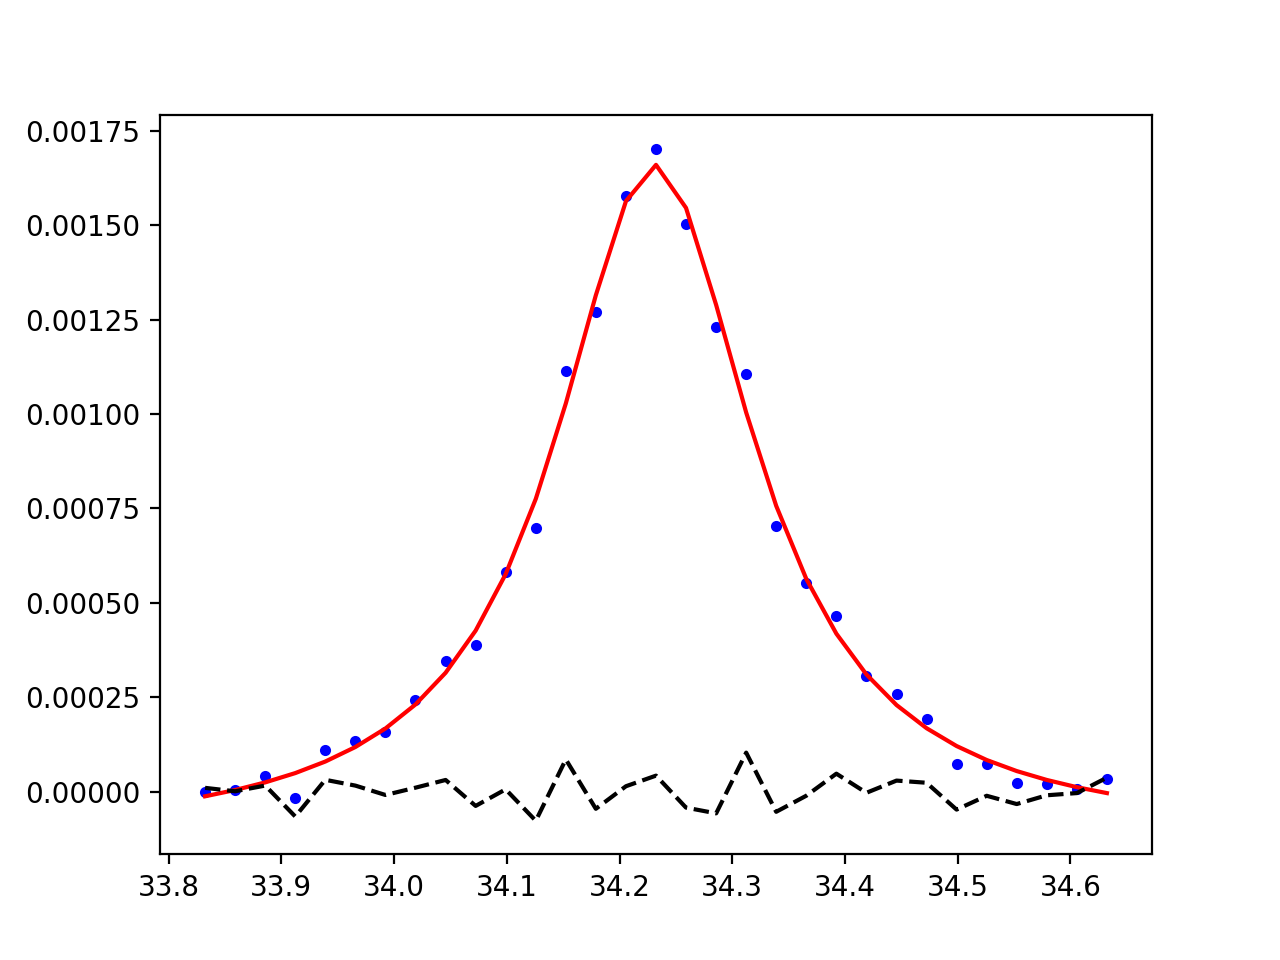

[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 37
    # data points      = 31
    # variables        = 5
    chi-square         = 4.8162e-08
    reduced chi-square = 1.8524e-09
    Akaike info crit   = -618.763141
    Bayesian info crit = -611.593205
[[Variables]]
    Area:    6.1071e-04 +/- 2.0838e-05 (3.41%) (init = 0.0003269628)
    Center:  34.2266046 +/- 0.00162225 (0.00%) (init = 34.20587)
    HWHM:    0.10973526 +/- 0.00349101 (3.18%) (init = 0.066625)
    Slope:   1.3246e-05 +/- 3.5433e-05 (267.51%) (init = -1.489387e-05)
    Offset: -5.9923e-04 +/- 0.00121379 (202.56%) (init = 7.328315e-06)
[[Correlations]] (unreported correlations are < 0.100)
    C(Slope, Offset)  = -0.9999
    C(Area, HWHM)     = +0.8996
    C(Center, Slope)  = -0.4029
    C(Center, Offset) = +0.4028


<IPython.core.display.Javascript object>


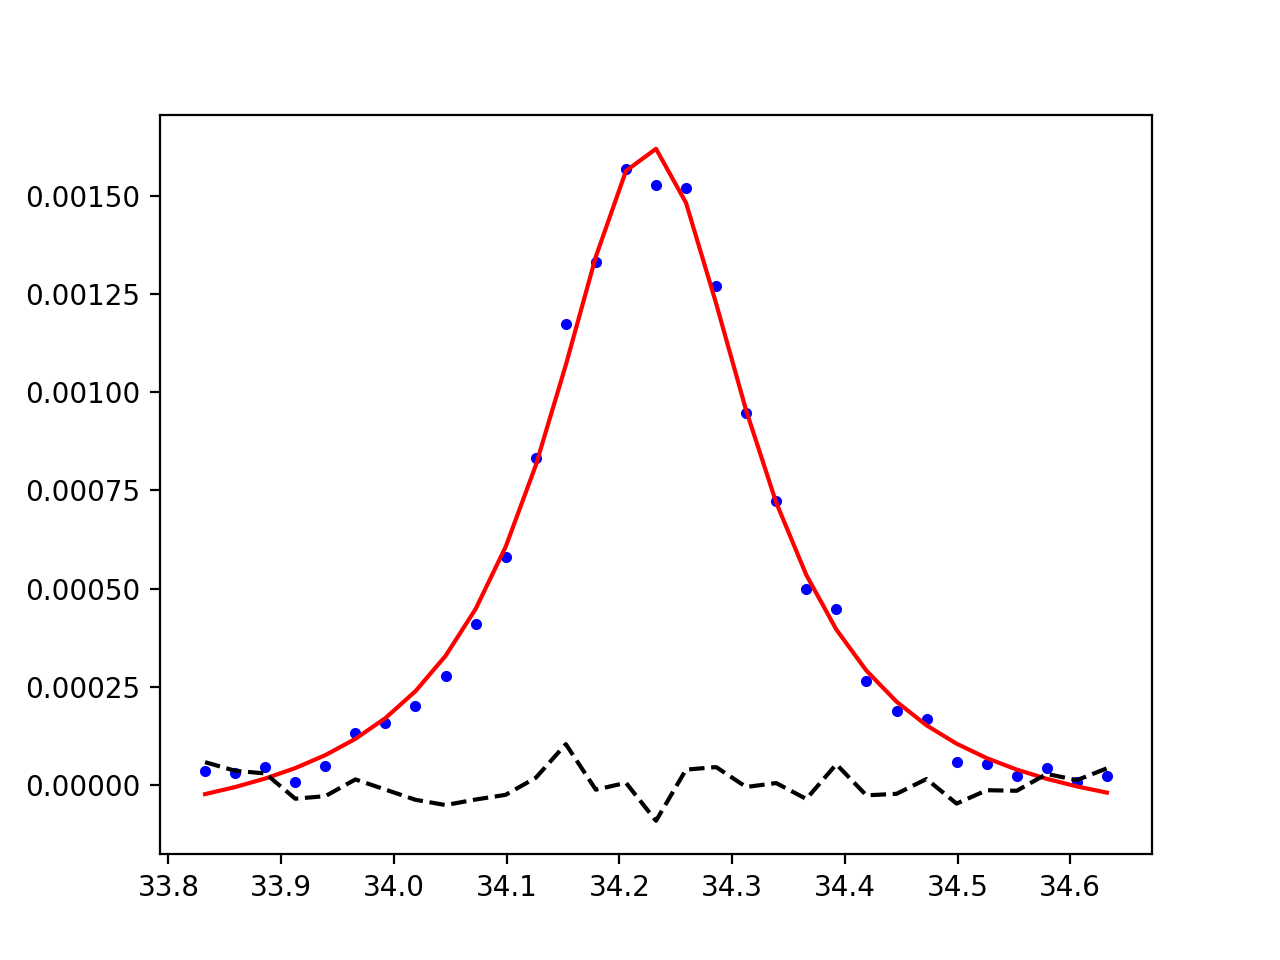

[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 37
    # data points      = 31
    # variables        = 5
    chi-square         = 3.4829e-08
    reduced chi-square = 1.3396e-09
    Akaike info crit   = -628.810675
    Bayesian info crit = -621.640739
[[Variables]]
    Area:    5.9277e-04 +/- 1.7596e-05 (2.97%) (init = 0.00033193)
    Center:  34.2299255 +/- 0.00141023 (0.00%) (init = 34.22675)
    HWHM:    0.10923991 +/- 0.00302904 (2.77%) (init = 0.066625)
    Slope:   8.7524e-07 +/- 3.0089e-05 (3437.73%) (init = 1.467236e-05)
    Offset: -1.6353e-04 +/- 0.00102967 (629.64%) (init = -2.634195e-06)
[[Correlations]] (unreported correlations are < 0.100)
    C(Slope, Offset)  = -0.9999
    C(Area, HWHM)     = +0.8990
    C(Center, Slope)  = -0.4008
    C(Center, Offset) = +0.4008


<IPython.core.display.Javascript object>


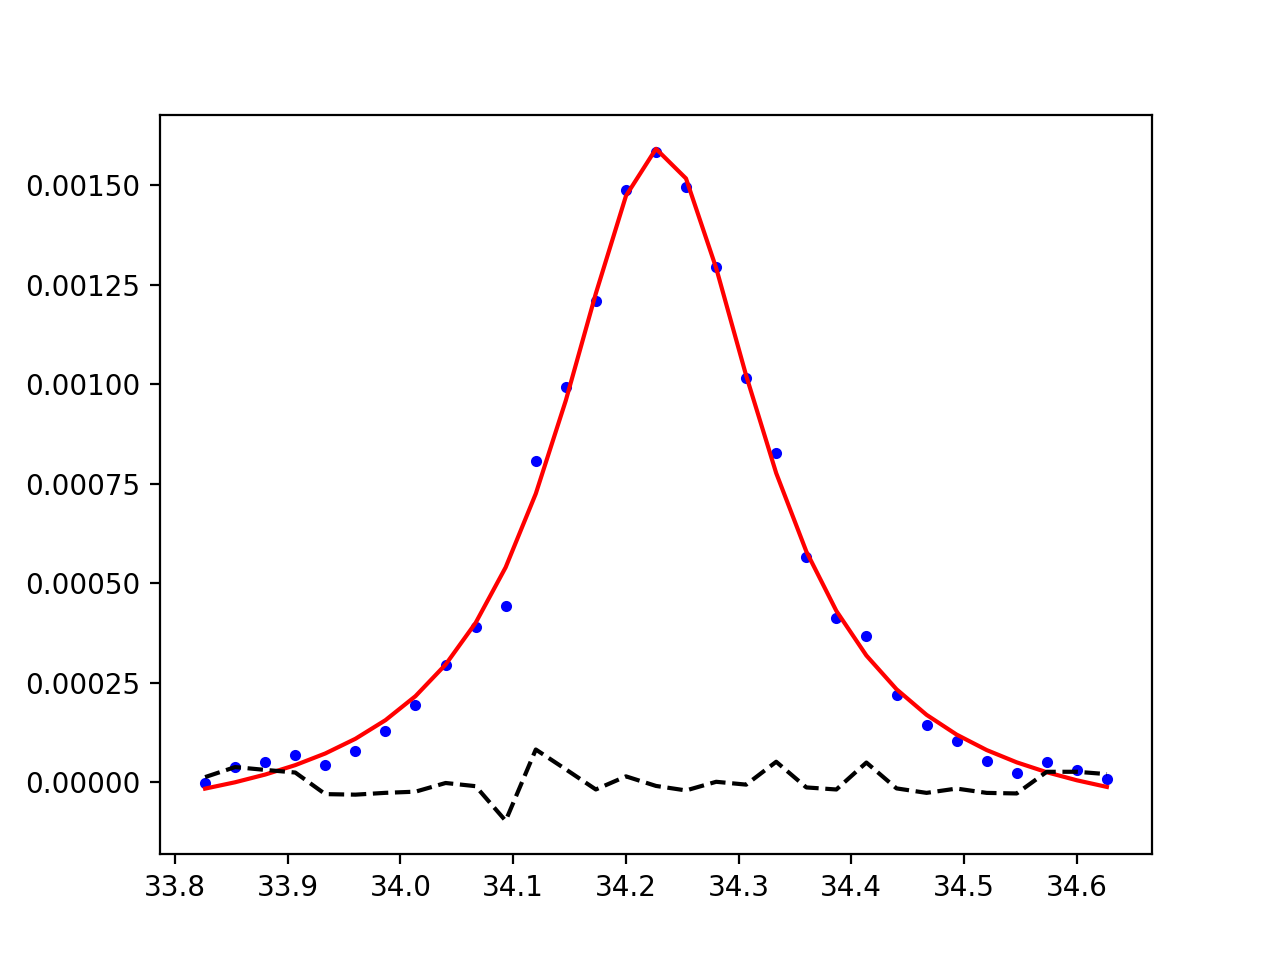

[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 37
    # data points      = 31
    # variables        = 5
    chi-square         = 3.9848e-08
    reduced chi-square = 1.5326e-09
    Akaike info crit   = -624.637697
    Bayesian info crit = -617.467761
[[Variables]]
    Area:    5.3753e-04 +/- 1.8185e-05 (3.38%) (init = 0.0003784521)
    Center:  34.2280649 +/- 0.00159831 (0.00%) (init = 34.23)
    HWHM:    0.10671042 +/- 0.00340278 (3.19%) (init = 0.08)
    Slope:  -1.1699e-05 +/- 3.2029e-05 (273.78%) (init = -3.746431e-05)
    Offset:  2.8629e-04 +/- 0.00109668 (383.07%) (init = -3.051826e-06)
[[Correlations]] (unreported correlations are < 0.100)
    C(Slope, Offset)  = -0.9999
    C(Area, HWHM)     = +0.8965
    C(Center, Slope)  = -0.3908
    C(Center, Offset) = +0.3908


<IPython.core.display.Javascript object>


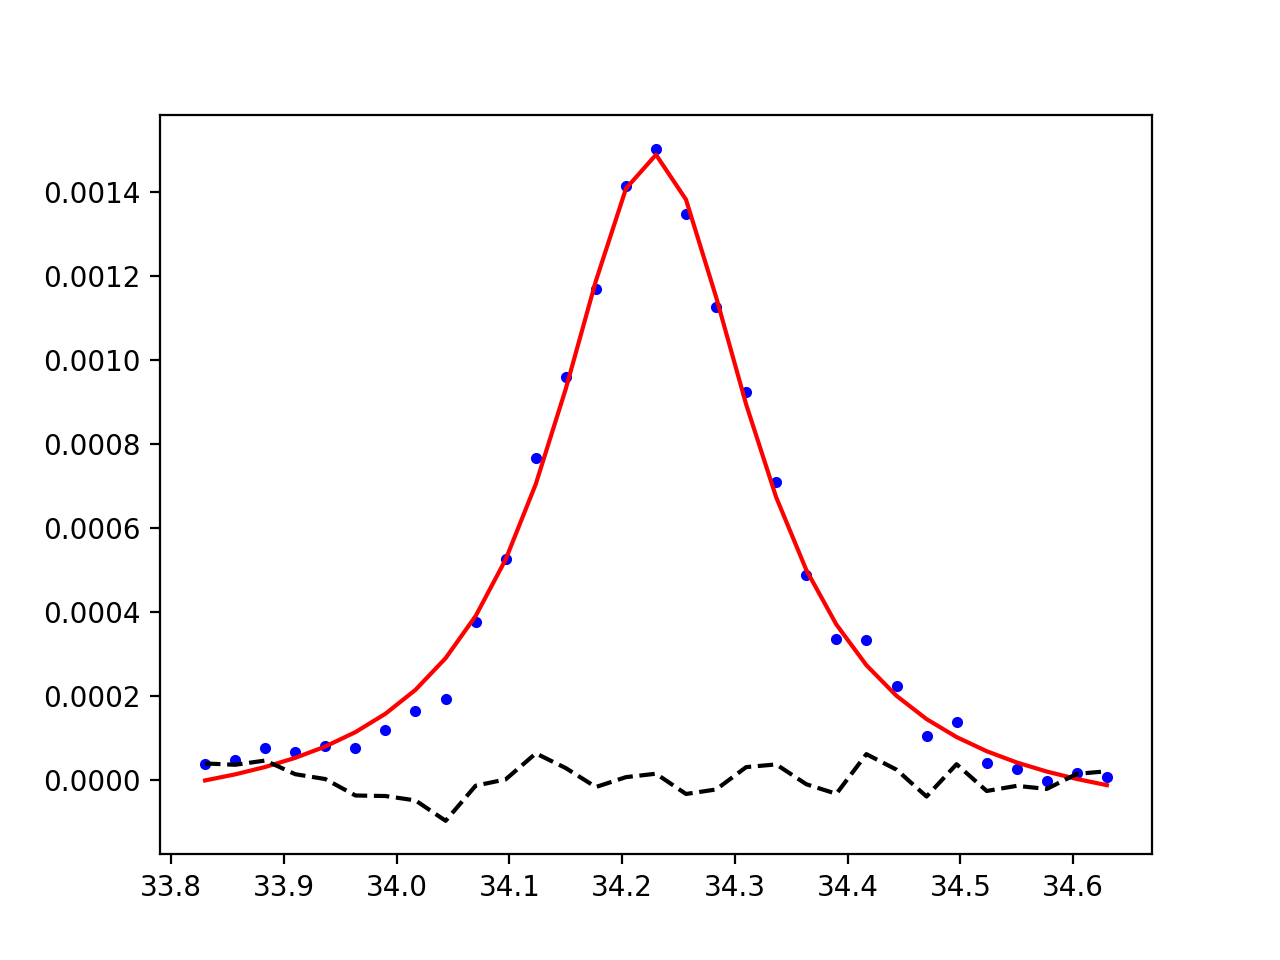

[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 37
    # data points      = 31
    # variables        = 5
    chi-square         = 2.5995e-08
    reduced chi-square = 9.9981e-10
    Akaike info crit   = -637.879713
    Bayesian info crit = -630.709777
[[Variables]]
    Area:    4.8296e-04 +/- 1.5302e-05 (3.17%) (init = 0.0003784144)
    Center:  34.2287403 +/- 0.00150699 (0.00%) (init = 34.22725)
    HWHM:    0.10973646 +/- 0.00324231 (2.95%) (init = 0.093375)
    Slope:  -9.9441e-06 +/- 2.6014e-05 (261.61%) (init = 2.52448e-05)
    Offset:  2.3440e-04 +/- 8.9040e-04 (379.86%) (init = -4.314037e-06)
[[Correlations]] (unreported correlations are < 0.100)
    C(Slope, Offset)  = -0.9999
    C(Area, HWHM)     = +0.8995
    C(Center, Slope)  = -0.4028
    C(Center, Offset) = +0.4027


<IPython.core.display.Javascript object>


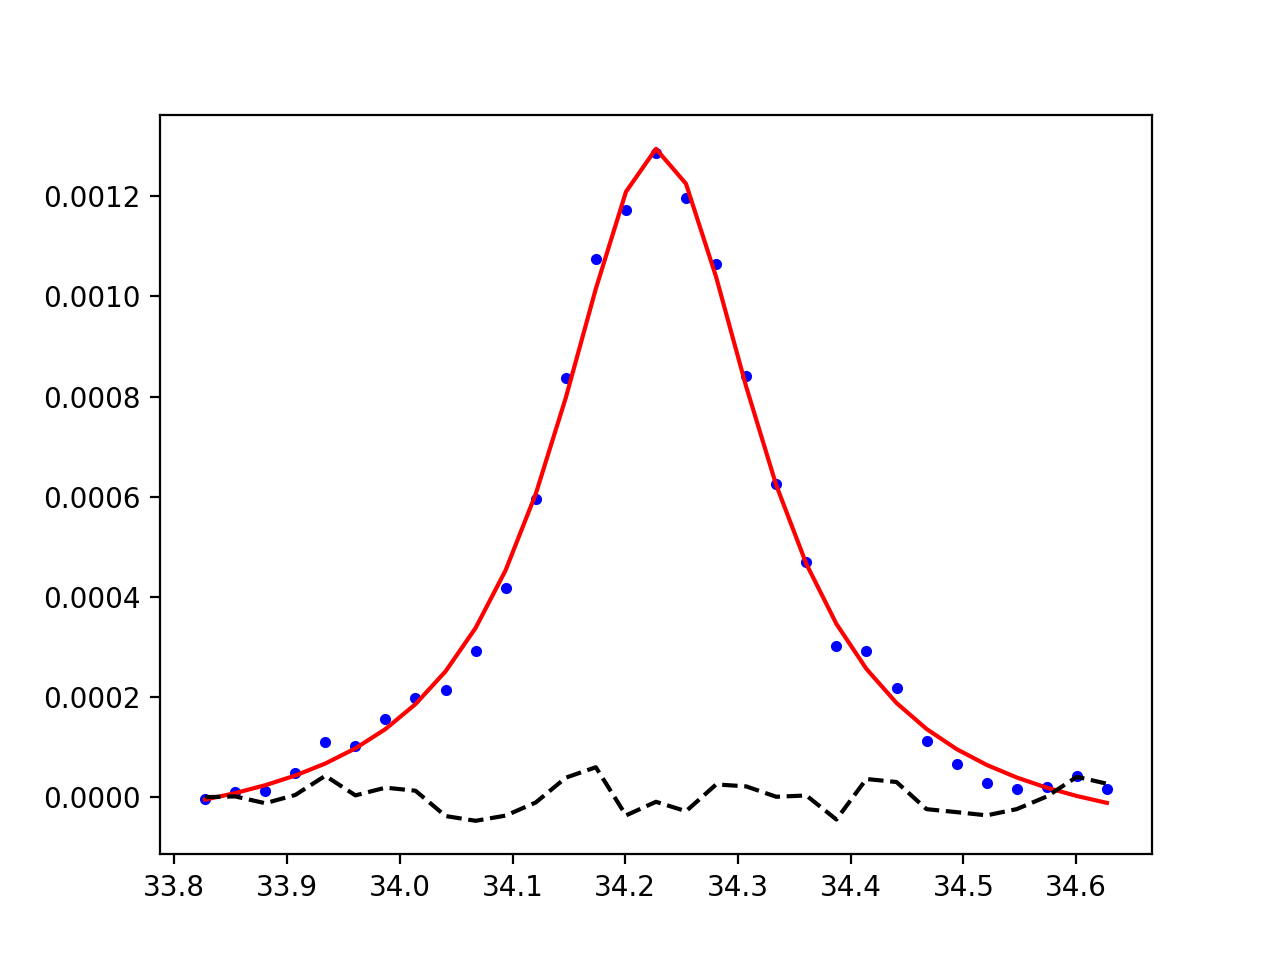

[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 25
    # data points      = 31
    # variables        = 5
    chi-square         = 3.5150e-08
    reduced chi-square = 1.3519e-09
    Akaike info crit   = -628.526189
    Bayesian info crit = -621.356253
[[Variables]]
    Area:    4.1838e-04 +/- 1.6230e-05 (3.88%) (init = 0.0003723664)
    Center:  34.2324085 +/- 0.00181601 (0.01%) (init = 34.23087)
    HWHM:    0.10298051 +/- 0.00381581 (3.71%) (init = 0.093375)
    Slope:  -2.5045e-05 +/- 2.9880e-05 (119.31%) (init = -5.339799e-05)
    Offset:  7.7327e-04 +/- 0.00102282 (132.27%) (init = -1.76229e-05)
[[Correlations]] (unreported correlations are < 0.100)
    C(Slope, Offset)  = -0.9999
    C(Area, HWHM)     = +0.8926
    C(Center, Slope)  = -0.3759
    C(Center, Offset) = +0.3759


C:\Users\Michael T\XRMS\batch-proc-and-fit\fit1D.py:128: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


<IPython.core.display.Javascript object>


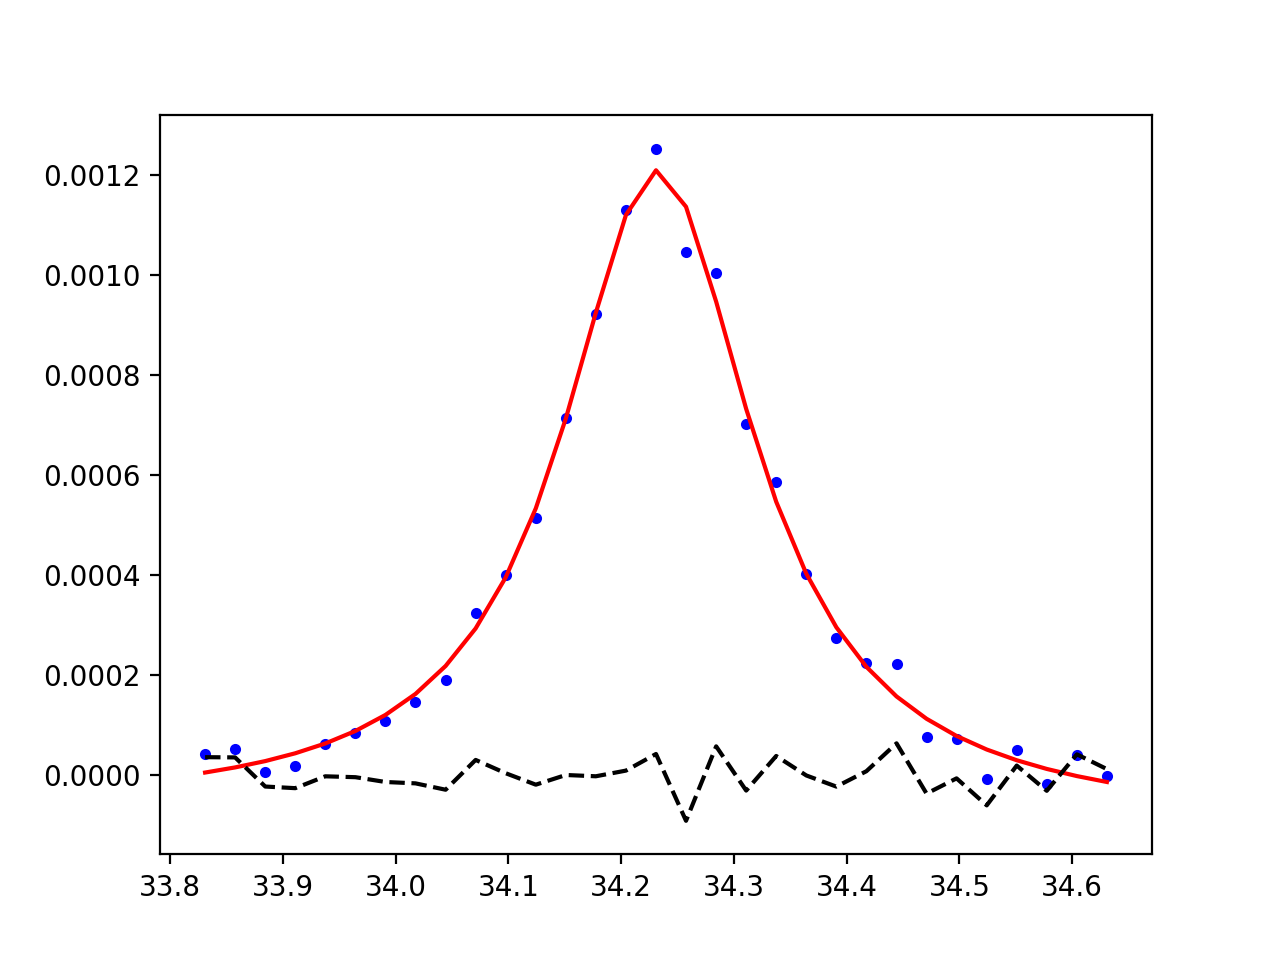

[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 37
    # data points      = 31
    # variables        = 5
    chi-square         = 4.6753e-08
    reduced chi-square = 1.7982e-09
    Akaike info crit   = -619.683344
    Bayesian info crit = -612.513408
[[Variables]]
    Area:    3.6346e-04 +/- 1.9269e-05 (5.30%) (init = 0.000228179)
    Center:  34.2266657 +/- 0.00249232 (0.01%) (init = 34.20913)
    HWHM:    0.10501982 +/- 0.00527734 (5.03%) (init = 0.066625)
    Slope:  -1.7853e-05 +/- 3.4640e-05 (194.02%) (init = 7.821503e-06)
    Offset:  5.4634e-04 +/- 0.00118699 (217.26%) (init = -1.149642e-05)
[[Correlations]] (unreported correlations are < 0.100)
    C(Slope, Offset)  = -0.9999
    C(Area, HWHM)     = +0.8948
    C(Center, Slope)  = -0.3844
    C(Center, Offset) = +0.3843


<IPython.core.display.Javascript object>


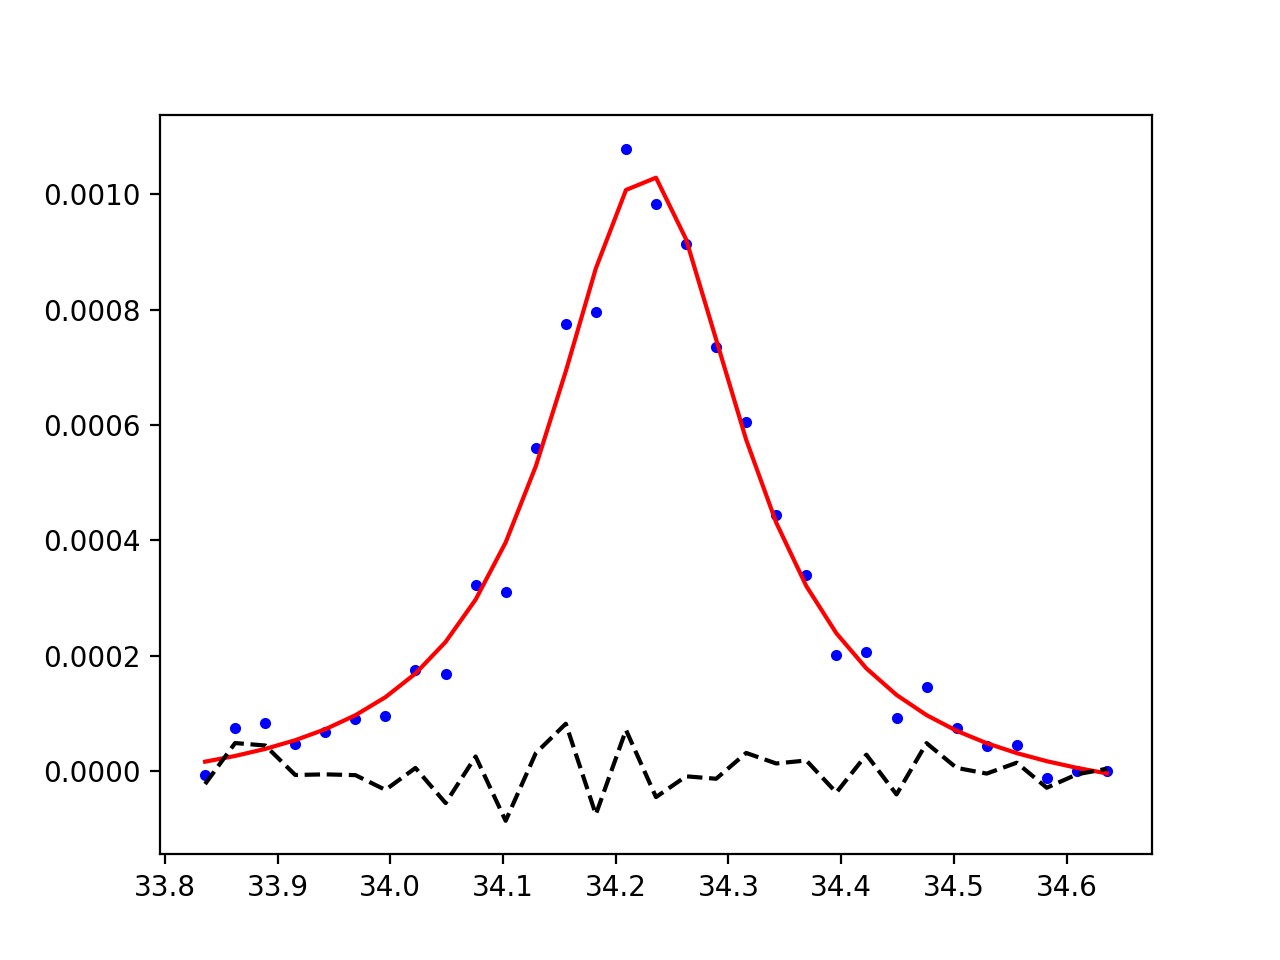

[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 43
    # data points      = 31
    # variables        = 5
    chi-square         = 2.6441e-08
    reduced chi-square = 1.0169e-09
    Akaike info crit   = -637.353016
    Bayesian info crit = -630.183080
[[Variables]]
    Area:    2.9415e-04 +/- 1.4819e-05 (5.04%) (init = 0.0001658957)
    Center:  34.2302820 +/- 0.00238045 (0.01%) (init = 34.20325)
    HWHM:    0.10674496 +/- 0.00506841 (4.75%) (init = 0.066625)
    Slope:   1.2181e-05 +/- 2.6090e-05 (214.19%) (init = -9.15735e-06)
    Offset: -4.8225e-04 +/- 8.9313e-04 (185.20%) (init = -1.878861e-05)
[[Correlations]] (unreported correlations are < 0.100)
    C(Slope, Offset)  = -0.9999
    C(Area, HWHM)     = +0.8965
    C(Center, Slope)  = -0.3910
    C(Center, Offset) = +0.3909


<IPython.core.display.Javascript object>


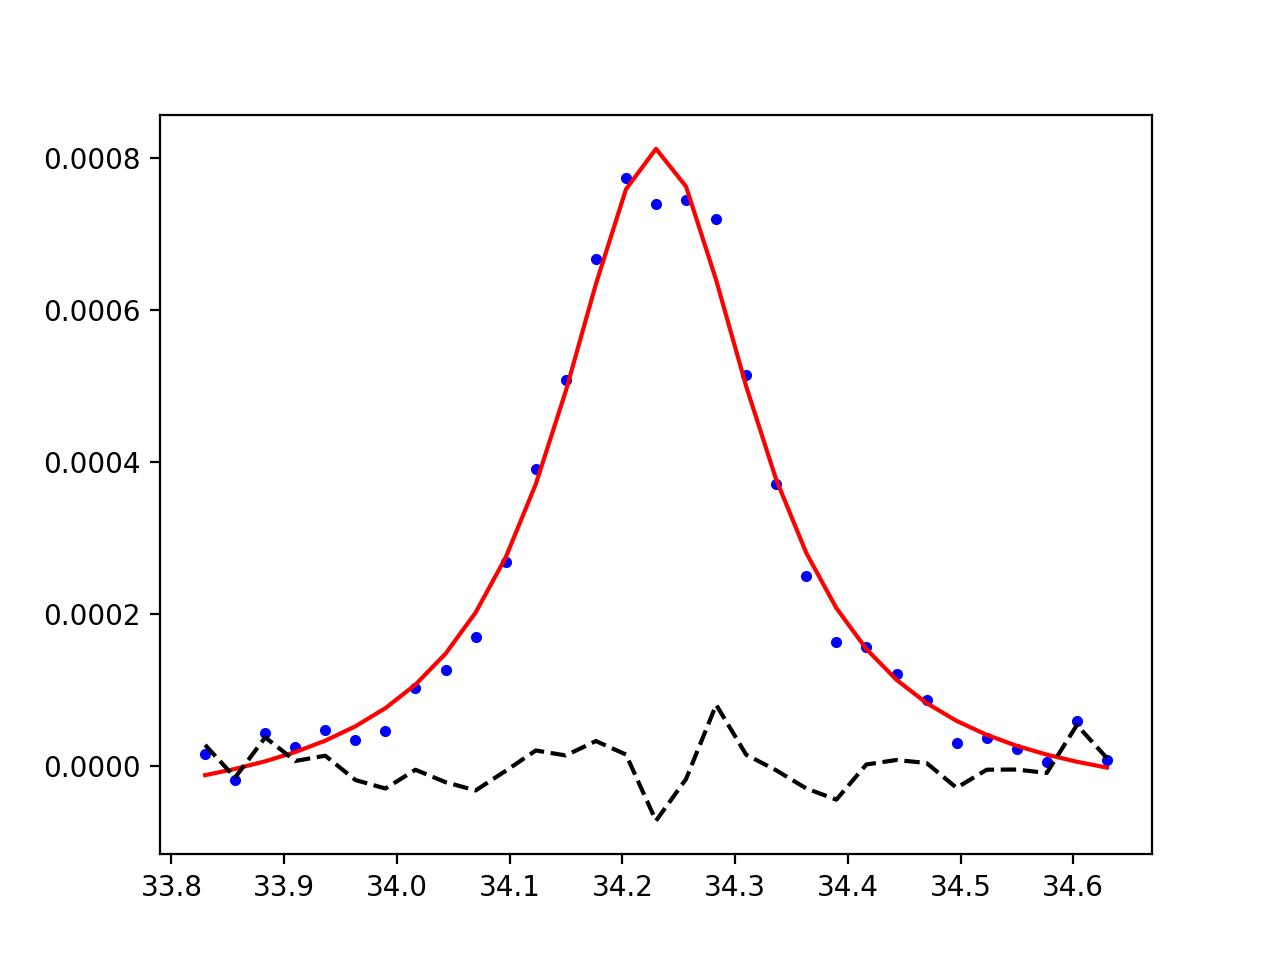

[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 25
    # data points      = 31
    # variables        = 5
    chi-square         = 3.8757e-08
    reduced chi-square = 1.4907e-09
    Akaike info crit   = -625.497907
    Bayesian info crit = -618.327970
[[Variables]]
    Area:    1.9043e-04 +/- 1.9740e-05 (10.37%) (init = 0.0001705184)
    Center:  34.2309726 +/- 0.00497043 (0.01%) (init = 34.22875)
    HWHM:    0.11383049 +/- 0.01084642 (9.53%) (init = 0.093375)
    Slope:  -2.3367e-05 +/- 3.2018e-05 (137.02%) (init = -6.16174e-05)
    Offset:  7.5170e-04 +/- 0.00109585 (145.78%) (init = -2.605219e-05)
[[Correlations]] (unreported correlations are < 0.100)
    C(Slope, Offset)  = -0.9999
    C(Area, HWHM)     = +0.9035
    C(Center, Slope)  = -0.4187
    C(Center, Offset) = +0.4187


<IPython.core.display.Javascript object>


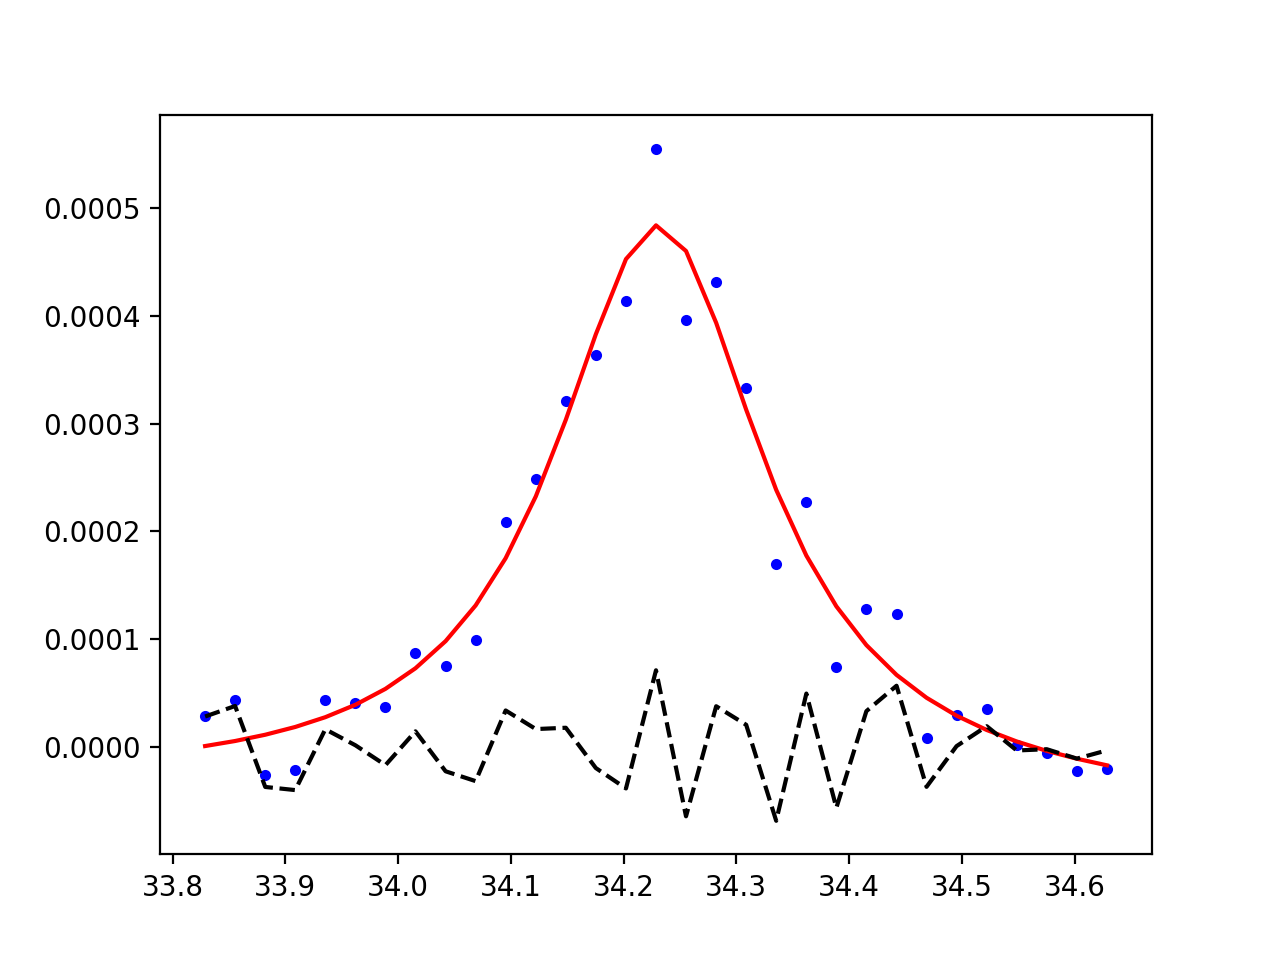

[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 164
    # data points      = 31
    # variables        = 5
    chi-square         = 1.9756e-08
    reduced chi-square = 7.5985e-10
    Akaike info crit   = -646.387409
    Bayesian info crit = -639.217472
[[Variables]]
    Area:    2.3409e-05 +/- 2.0090e-05 (85.82%) (init = 3.653013e-05)
    Center:  34.2539965 +/- 0.04167750 (0.12%) (init = 34.13513)
    HWHM:    0.13935377 +/- 0.09969841 (71.54%) (init = 0.106625)
    Slope:  -4.9152e-05 +/- 2.5204e-05 (51.28%) (init = -8.383352e-05)
    Offset:  0.00169465 +/- 8.5807e-04 (50.63%) (init = -1.682556e-05)
[[Correlations]] (unreported correlations are < 0.100)
    C(Slope, Offset)  = -0.9998
    C(Area, HWHM)     = +0.9262
    C(Center, Offset) = +0.5200
    C(Center, Slope)  = -0.5196
    C(Area, Slope)    = -0.2784
    C(Area, Offset)   = +0.2616
    C(HWHM, Slope)    = -0.2228
    C(HWHM, Offset)   = +0.2077
    C(Area, Center)   = +0.1237


<IPython.core.display.Javascript object>


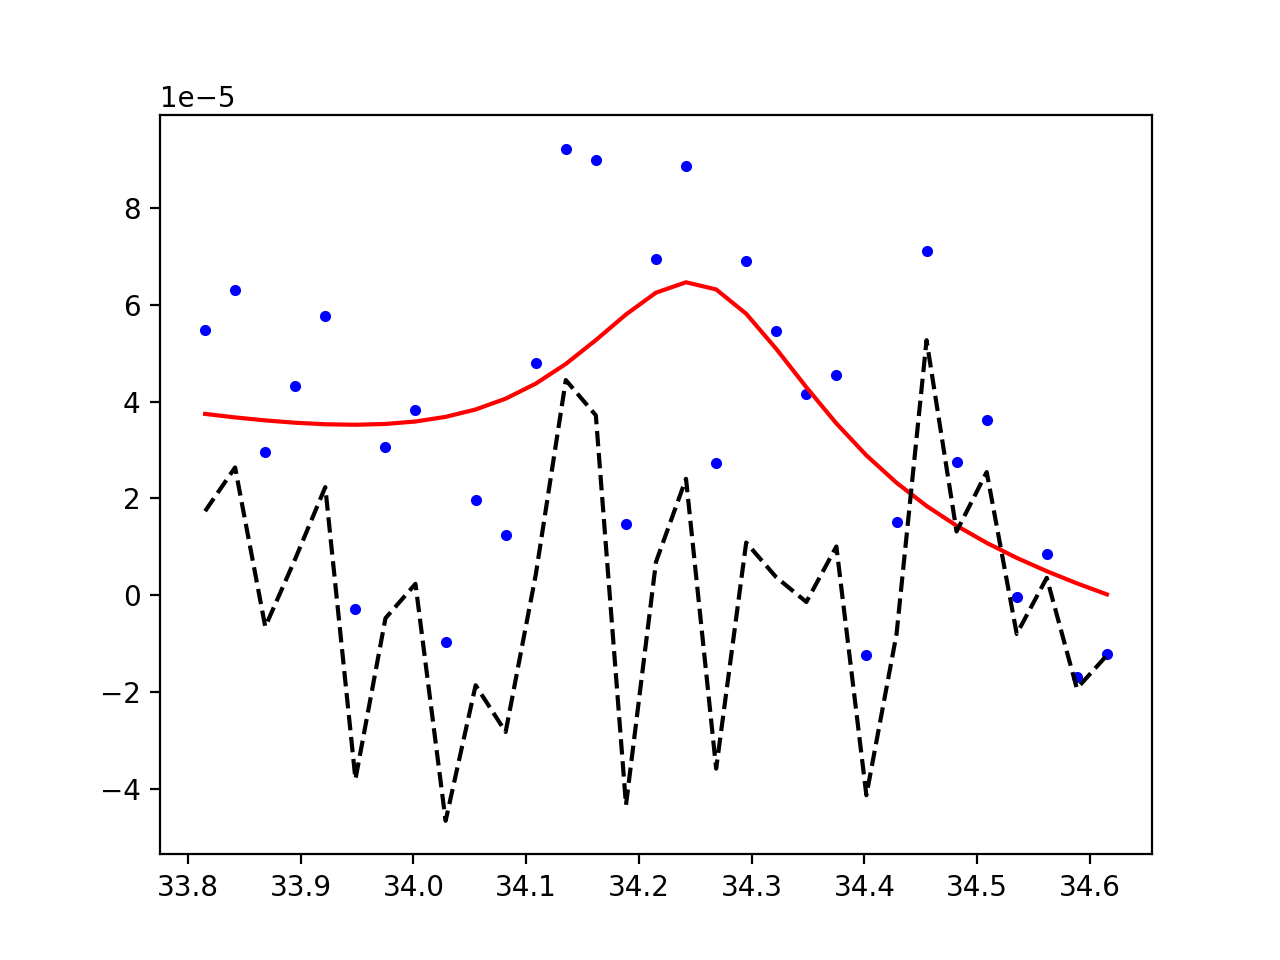

In [84]:
SIDs = np.array([15, 18, 21, 24, 27, 30, 33, 36, 39, 42, 45, 48, 51, 54])
#Ts = np.array([])

xs = []
ys = []
fitys = []
areas = []
areas_err = []
sigmas = []
sigmas_err = []
Ts = []


for j, s in enumerate(SIDs):
    df = getSpecScan(sf, s)
    tmpx = np.array(df['Eta'])
    tmpy = np.array(df['Detector']/df['Ion_Ch_2'])
    tmpT = np.array(df['Temp_sam']).mean()
    
    lbg = LorLBG(fit_params_bg, tmpx)
    
    tmpy = tmpy - lbg
    
    if s == 15:
        df_15 = pd.DataFrame()
        df_15['x'] = tmpx
        df_15['y'] = tmpy
        df_15.to_csv('15.csv')
        
    if s == 51:
        df_51 = pd.DataFrame()
        df_51['x'] = tmpx
        df_51['y'] = tmpy
        df_51.to_csv('51.csv')
    
    fit_params, _, _, fitted, _, _ = do_fit(tmpx, tmpy, LorLinearBG, guess_LorLinearBG, verbose=True, plotFit=True)
    
    xs.append(tmpx)
    ys.append(tmpy)
    fitys.append(fitted)
    Ts.append(tmpT)
        
    sigmas.append(fit_params['value'].loc['HWHM'])
    sigmas_err.append(fit_params['err'].loc['HWHM'])
        
    areas.append(fit_params['value'].loc['Area'])
    areas_err.append(fit_params['err'].loc['Area'])
    
xs = np.array(xs)
ys = np.array(ys)
fitys = np.array(fitys)
areas = np.array(areas)
areas_err = np.array(areas_err)
sigmas = np.array(sigmas)
sigmas_err = np.array(sigmas_err)
Ts = np.array(Ts)

#account for I ~ M^2
mags = np.sqrt(areas)
areas_err_percents = (areas_err/areas)/2
mags_err = mags*areas_err_percents

In [21]:
data_ = pd.DataFrame()
for i in range(len(xs)):
    T = str(int(round(Ts[i]))) #rounds temps to nearest digit
    data_[T+'_eta'] = xs[i]
    data_[T+'_intensity'] = ys[i]
    data_[T+'_fits'] = fitys[i]
data_.to_csv('XRMS_data.csv')